#Librerias

#Librerias

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
import copy
#%matplotlib inline

#Principal

Aqui se maneja el codigo, se puede modificar:
  
  -La cantidad maxima de iteraciones
  
  -Vector inicial

  -La funcion a evaluar

  Eng:
  
  Here you can control the code, you can modify:
  
  -The maximum amount of iterations

  -The initial Vector

  -The function to evaluate

* Iteracion 1   - Vector: [1.25, -2.25]   - F(V): 2.59375 - Lambda 0.25  -Deseado 0.18181818181818182
* Iteracion 2   - Vector: [1.375, -1.4375]   - F(V): 1.115234375 - Lambda 0.25  -Deseado 0.18181818181818182
* Iteracion 3   - Vector: [0.96875, -1.296875]   - F(V): 0.6214599609375 - Lambda 0.25  -Deseado 0.18181818181818182
* Iteracion 4   - Vector: [0.8984375, -1.05859375]   - F(V): 0.43611907958984375 - Lambda 0.25  -Deseado 0.18181818181818182
* Iteracion 5   - Vector: [0.779296875, -0.9638671875]   - F(V): 0.36272573471069336 - Lambda 0.25  -Deseado 0.18181818181818182
* Iteracion 6   - Vector: [0.73193359375, -0.880615234375]   - F(V): 0.3330257833003998 - Lambda 0.25  -Deseado 0.18181818181818182
* Iteracion 7   - Vector: [0.6903076171875, -0.83612060546875]   - F(V): 0.32090664468705654 - Lambda 0.25  -Deseado 0.18181818181818182
* Iteracion 8   - Vector: [0.668060302734375, -0.8041839599609375]   - F(V): 0.3159458761801943 - Lambda 0.25  -Deseado 0.18181818181818182
* Iteraci

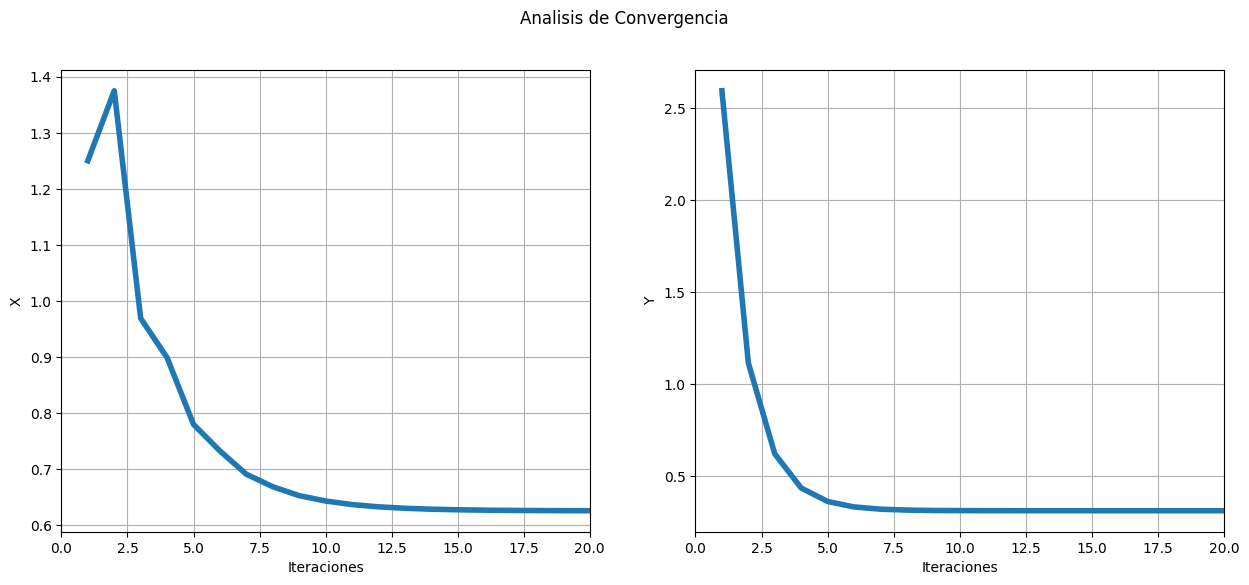

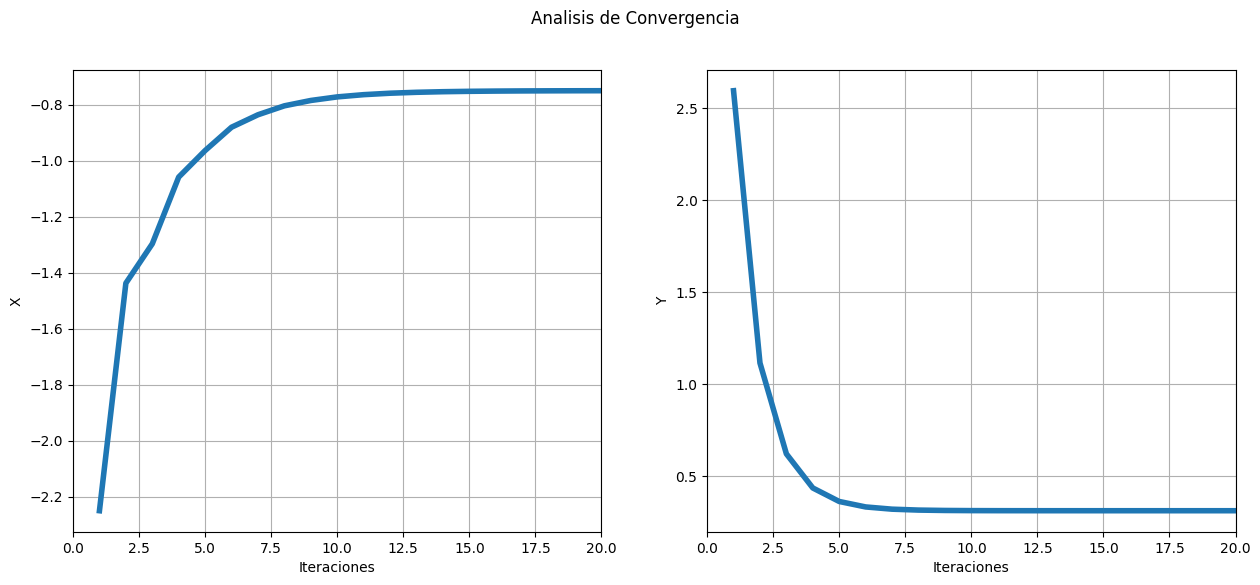

In [30]:
IterMax=50
vector=[3,-2]


#Function Mod
numvar=2
x=sympy.symbols('x')
y=sympy.symbols('y')
namevar=['x','y']


c=1
#f=100*(y-x**2)**2-(1-x)**2
f=2*x**2+2*x*y+(3/2)*y**2-x+y+c



TG=100
Contador=0
Registrox=[]
Registroy=[]

while(TG>0.001 and Contador<IterMax):
  TG=0

  #Evaluamos gradiente en el vector
  EvalGrad=Gradiente(vector)



  #Obtenemos el paso (es decir alpha)
  Lambda=Paso(EvalGrad,vector,Inic)



  #Sacamos al nuevo vector
  for i in range(0,numvar):
    vector[i]=vector[i]+Lambda*EvalGrad[i]



  #Obtenemos la norma del gradiente
  for i in range(0,numvar):
    TG+=EvalGrad[i]**2

  TG=np.sqrt(TG)

  #Obtenemos el evaluado del vector
  Fev=f
  for i in range(0,numvar):
    Fev=Fev.subs(namevar[i],vector[i])


  TF=float(Fev)



  #Agregamos a registro
  Contador+=1
  Registrox.append([Contador,vector[0],TF])
  Registroy.append([Contador,vector[1],TF])


  #Obtenemos Lambda deseada
  A=[[4,2],[2,3]]
  Desb=np.matmul(Grad,np.matmul(A,Grad))
  Desu=np.matmul(Grad,Grad)
  Deseado=Desu/Desb
  print("* Iteracion",Contador,"  - Vector:",vector,"  - F(V):",float(TF), "- Lambda",Lambda," -Deseado",Deseado)

Evaluacion(Registrox)
Evaluacion(Registroy)

#Gradiente

In [3]:
def Gradiente(vector):

    grad=[]
    #Creacion Gradiente
    for i in range (0,numvar):
        g=-1*sympy.diff(f,namevar[i])
        grad.append(g)

    #evaluacion del gradiente en los puntos
    for i in range(0,numvar):
      for j in range(0,numvar):
        grad[i]=grad[i].subs(namevar[j],vector[j])
    #convertir a float
    for i in range(0,numvar):
      grad[i]=float(grad[i])


    return grad

#Paso

In [18]:
def Paso(Grad,Vector,Inic):
#if(True):
  Lambda=1
  a=0.0001
  b=0.1
  Grad=[-12,-8.5]
  Vector=[3,0.5]

  while(Function(np.add(Vector,np.multiply(Grad,Lambda)))>(Function(Vector)+a*Lambda*np.matmul(Grad,Grad)) and b*np.matmul(Grad,Grad)>np.matmul(Gradiente(np.add(Vector,np.multiply(Lambda,Grad))),Grad)):
    Lambda=0.5*Lambda

  return Lambda


#Funcion

In [11]:
def Function(Vector):
  Fe=f
  for i in range(0,numvar):
    Fe=Fe.subs(namevar[i],Vector[i])

  Fe=float(Fe)
  return Fe

#Evaluacion

In [22]:
#Evalua los registros dados de los metodos
def Evaluacion(Registro):
  #Conversion para facilitar la graficacion
  Registro=np.array(Registro)

  fig, axs=plt.subplots(1,2,figsize=(15,6))
  #Ponemos titulo
  fig.suptitle('Analisis de Convergencia')
  #Primera Grafica
  axs[0].plot(Registro[:,0],Registro[:,1],linewidth=4)
  axs[0].set_xlabel('Iteraciones')
  axs[0].set_ylabel('X')
  axs[0].grid()
  axs[0].set_xlim([0,len(Registro)])
  #Segunda Grafica
  axs[1].plot(Registro[:,0],Registro[:,2],linewidth=4)
  axs[1].set_xlabel('Iteraciones')
  axs[1].set_ylabel('Y')
  axs[1].grid()
  axs[1].set_xlim([0,len(Registro)])
  #Mostramos las graficas
  plt.show()